## density plot generator

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy
from scipy import stats
from scipy import integrate
import random
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.cosmology import WMAP9 as cosmo

In [2]:
sz = 5.0
#result = pd.read_csv('result_Simbad_z_modified.csv')

fname = 'result_hina_' + str(sz) + '.csv'
print(fname)
#result = pd.read_csv('hina/result_hina_15.0.csv')
result = pd.read_csv(fname)
gal_num = len(result)
#result = pd.read_csv('hina/result_hina_10.0.csv')
print('This file contains', gal_num, 'objects')
#len_udg = 4715
#len_udg_red = 3354
#len_udg_blue = 1288

result_hina_5.0.csv
This file contains 206208 objects


In [3]:
comp_lim = .2 # Cut off of completion rate
cat = pd.read_csv('CatalogDECaLSfinal.csv') # UDG catalog
#udg_lis = np.array(cat['SMDG'])
UDG_kept = pd.DataFrame(cat[(cat['Comp']>comp_lim)]) # > comp_lim 
UDG_dropped = cat[(cat['Comp']<comp_lim)] # < comp_lim, getting tossed
print(len(UDG_dropped), 'UDGs have Comp less than', comp_lim, ';',np.round(len(UDG_dropped)*100/len(cat), 2),'% dropped')

454 UDGs have Comp less than 0.2 ; 7.88 % dropped


In [4]:
num_sum = 0
for i in range(len(UDG_dropped)):
    num_cut = len(result[(result['UDG id'] == np.array(UDG_dropped['SMDG'])[i])])
    num_sum += num_cut
    #print(num_cut)

In [5]:
print(num_sum, 'galaxies should get dropped; this is', np.round(num_sum*100/gal_num, 2), '%')

16173 galaxies should get dropped; this is 7.84 %


In [6]:
for i in range(len(UDG_dropped)): # Drops galaxies associated with UDGs that are dropped
    result_dropped = result[(result['UDG id'] != np.array(UDG_dropped['SMDG'])[i])]
    result = result_dropped

In [7]:
len(result), len(result_dropped)

(190035, 190035)

In [8]:
print(gal_num-len(result), 'galaxies have been dropped; this is', np.round((gal_num-len(result))*100/gal_num, 2), '%')

16173 galaxies have been dropped; this is 7.84 %


In [9]:
#comp = pd.DataFrame(cat['Comp'])

In [10]:
sep_all, sep_blue, sep_red = np.array([]),np.array([]),np.array([])
weight_all, weight_blue, weight_red = np.array([]), np.array([]), np.array([])
# set minimium projected separation
min_sep = 0.1
for i in range(0, len(result_dropped)): 
    if result['separation'].iloc[i] > min_sep and result['color'].iloc[i] < 0.9:
        sep_all = np.append(sep_all, result['separation'].iloc[i])
        df = UDG_kept[(cat["SMDG"] == result['UDG id'].iloc[i])] 
        weight_all = np.append(weight_all, 1/df['Comp'])
        if (result_dropped['color'].iloc[i] < 0.45):
            sep_blue = np.append(sep_blue, result['separation'].iloc[i])
            weight_blue = np.append(weight_blue, 1/df['Comp'])
            #print(i, df['Comp'])
        elif (result_dropped['color'].iloc[i] < 0.9):
            sep_red = np.append(sep_red, result['separation'].iloc[i])
            weight_red = np.append(weight_red, 1/df['Comp'])

<ipython-input-10-46e980fc9371>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = UDG_kept[(cat["SMDG"] == result['UDG id'].iloc[i])]


In [11]:
# Calculates the number of UDGs in the catalog
color = np.array(UDG_kept['mag_g']) - np.array(UDG_kept['mag_r'])
all_udg, red_udg, blue_udg = np.array([]), np.array([]), np.array([])
for i in range(len(UDG_kept)):
    if color[i] < .45:
        blue_udg = np.append(blue_udg, color[i])
    elif color[i] < .9:
        red_udg = np.append(red_udg, color[i])
len_udg = len(UDG_kept)
len_udg_red = len(red_udg)
len_udg_blue = len(blue_udg)

In [12]:
len_udg, len_udg_red, len_udg_blue

(5306, 3822, 1453)

In [13]:
print(len(sep_red),'matches to red UDGs;', len(sep_blue), 'matches to blue UDGs;',len(sep_all),'total matches')

135551 matches to red UDGs; 52606 matches to blue UDGs; 188157 total matches


In [14]:
len(weight_all), len(sep_all)

(188157, 188157)

[ 3774.25738376  5761.60048854  7309.4594593   9061.85074635
  9400.77672465 10783.67538689 11307.42212988 11923.75562338
 12385.95343821 13150.1813971  13698.74770305 14454.10532274
 15323.40504551 16077.43803803 16728.78772261 17394.07514062
 18618.37364492 19010.10459766 20626.87528779 21280.35213783
 21903.85111515 22034.33039555 23097.24306867 23802.87687367
 24979.91307889 25355.18641934 26428.58277795]


array([0.10011225, 0.3023056 , 0.50449895, 0.70669229, 0.90888564,
       1.11107899, 1.31327233, 1.51546568, 1.71765903, 1.91985237,
       2.12204572, 2.32423907, 2.52643242, 2.72862576, 2.93081911,
       3.13301246, 3.3352058 , 3.53739915, 3.7395925 , 3.94178584,
       4.14397919, 4.34617254, 4.54836588, 4.75055923, 4.95275258,
       5.15494592, 5.35713927, 5.55933262])

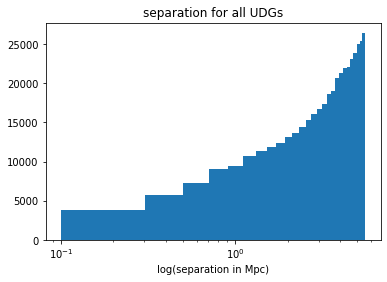

In [15]:
fig, ax = plt.subplots()

ax.set(title='separation for all UDGs', xlabel='log(separation in Mpc)')

# lets make bins be the same width regardless of which file is used (normalized to 15 bins for result_hina_1.csv
# 5 bins for sz = 1
bins = int(5*(sz-min_sep)/(1-min_sep))
hist_UDGs = plt.hist(sep_all, bins=bins, density=False, weights = weight_all) # weight=
plt.gca().set_xscale('log') # changes the scale to log

plt.show
#plt.legend;
print(hist_UDGs[0])
hist_UDGs[1] # edges of each bin (=x values), which later will be used as radius 

<function matplotlib.pyplot.show(close=None, block=None)>

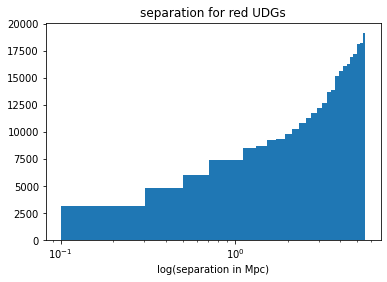

In [16]:
# Creates the histogram of red UDGs
#redhist = plt.hist(red, bins=15)#bins_list)
#plt.gca().set_xscale('log')
fig, ax = plt.subplots()
ax.set(title='separation for red UDGs', xlabel='log(separation in Mpc)')

redhist = plt.hist(sep_red, bins=bins, weights = weight_red)
plt.gca().set_xscale('log') # changes the scale to log

plt.show
#redhist[0]

<function matplotlib.pyplot.show(close=None, block=None)>

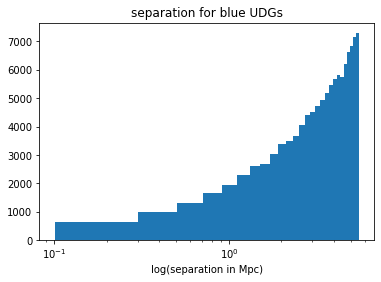

In [17]:
# Creates the histogram of blue UDGs
fig, ax = plt.subplots()
ax.set(title='separation for blue UDGs', xlabel='log(separation in Mpc)')

bluehist = plt.hist(sep_blue, bins=bins, weights = weight_blue)
plt.gca().set_xscale('log') # changes the scale to log

plt.show

In [18]:
# ---Calculate/define uncertainty below---
# uncertainty = sqrt(n)
import uncertainties
from uncertainties import unumpy as unp
# XX_err are arrays of values +/- uncertainty
all_err = unp.uarray(hist_UDGs[0], np.sqrt(hist_UDGs[0]))
red_err = unp.uarray(redhist[0], np.sqrt(redhist[0]))
blue_err = unp.uarray(bluehist[0], np.sqrt(bluehist[0]))

In [19]:
# Below is used to calculate areas of annuli 
# Skip to the next cell for log scaling
area_annulus = np.array([])
# Calculates the area of annulus (= pi*(R^2-r^2))
a = np.array([])

# NEW
for i in range(0, bins):
# in case of Kpc, radius would be 100, 200, 300,..., 1500 kpc
    R = hist_UDGs[1][i+1] # R = outer radius
    r = hist_UDGs[1][i] # r = inner radius 
    # calculate area of annulus and convert to Mpc^-2
    area = np.pi*(R**2 - r**2) 
    area_annulus = np.append(area_annulus, area)
    a = np.append(a, (hist_UDGs[1][i] + hist_UDGs[1][i+1])/2.)
       
#print(area_annulus)

[0.2556195  0.51248962 0.76935974 1.02622986 1.28309998 1.5399701
 1.79684022 2.05371034 2.31058046 2.56745059 2.82432071 3.08119083
 3.33806095 3.59493107 3.85180119 4.10867131 4.36554143 4.62241155
 4.87928167 5.13615179 5.39302192 5.64989204 5.90676216 6.16363228
 6.4205024  6.67737252 6.93424264]


In [20]:
### Calculates density of UDGs ###
UDGs_hist = np.array([])
density_red = np.array([])
density_blue = np.array([])

for i in range(0,bins):
    density_UDGs = all_err[i]/area_annulus[i]
    density_r = red_err[i]/area_annulus[i]
    density_b = blue_err[i]/area_annulus[i]
    
# Appends density of UDGs to existing arrays     
    UDGs_hist = np.append(UDGs_hist, density_UDGs)
    density_red = np.append(density_red, density_r)
    density_blue = np.append(density_blue, density_b)

#print(UDGs_hist)

In [21]:
print(len_udg, len_udg_red, len_udg_blue)

5306 3822 1453


In [22]:
# ---Normalize the densities by diving by the length-- #
x_prime = a
y_prime = unp.log10(UDGs_hist/len_udg)
y_r = unp.log10(density_red/len_udg)#len_udg_red)
y_b = unp.log10(density_blue/len_udg)#_blue)
y_prime_lin = (UDGs_hist/len_udg)
y_r_lin = (density_red/len_udg)#_red)
y_b_lin = (density_blue/len_udg)#_blue)


In [23]:
# Creates separate arrays for values and uncertainties for the plotting
y_prime_val, y_prime_err = [],[]
y_r_val, y_r_err = [], []
y_b_val, y_b_err = [], []
y_prime_lin_val, y_prime_lin_err = [], []
y_r_lin_val, y_r_lin_err = [], []
y_b_lin_val, y_b_lin_err = [], []
for i in range(len(y_prime)):
# Separates y_prime_lin
    y_prime_val.append(y_prime[i].n) # Value
    y_prime_err.append(y_prime[i].s) # Uncertainty
# Separates y_r 
    y_r_val.append(y_r[i].n)
    y_r_err.append(y_r[i].s) 
# Separates y_b
    y_b_val.append(y_b[i].n)
    y_b_err.append(y_b[i].s)
# Separates y_prime_lin
    y_prime_lin_val.append(y_prime_lin[i].n)
    y_prime_lin_err.append(y_prime_lin[i].s)
# Separates y_r_lin
    y_r_lin_val.append(y_r_lin[i].n)
    y_r_lin_err.append(y_r_lin[i].s)
# Separates y_b_lin
    y_b_lin_val.append(y_b_lin[i].n)
    y_b_lin_err.append(y_b_lin[i].s)

In [24]:

def power_all(x, a, k, b):
    return a*(x**k) + b
def power_red(x, a, k, b):
    return a*(x**k) + b
def power_blue(x, a, k, b):
    return a*(x**k) + b

all_bac  =  0.14
red_back  =  0.14
blue_back =  0.14
def power_all_fixed(x, a, k):
    return a*(x**k) + all_back
def power_red_fixed(x, a, k):
    return a*(x**k) + red_back
def power_blue_fixed(x, a, k):
    return a*(x**k) + blue_back

all UDGs constants:  [ 0.94891562 -0.66296586  0.39169516]
a = 0.9489156163031328 +/- 0.06509440054387236 
k = -0.6629658645301296 +/- 0.05581142436460724 
b = 0.39169515654629183 +/- 0.05419609805804206
red UDGs constants:  [ 0.78338158 -0.70527589  0.26757653]
a = 0.7833815763901734 +/- 0.05748286214283348 
k = -0.7052758913234441 +/- 0.06272136698939618 
b = 0.26757652581168323 +/- 0.04621144914166722
blue UDGs constants:  [ 0.18148597 -0.41534348  0.1058318 ]
a = 0.18148596549187604 +/- 0.025181984194095695 
k = -0.41534347639474156 +/- 0.07233410577012875 
b = 0.10583180437307056 +/- 0.024193427868406964
[0.20120893 0.40340227 0.60559562 0.80778897 1.00998231 1.21217566
 1.41436901 1.61656235 1.8187557  2.02094905 2.2231424  2.42533574
 2.62752909 2.82972244 3.03191578 3.23410913 3.43630248 3.63849582
 3.84068917 4.04288252 4.24507586 4.44726921 4.64946256 4.8516559
 5.05384925 5.2560426  5.45823594]


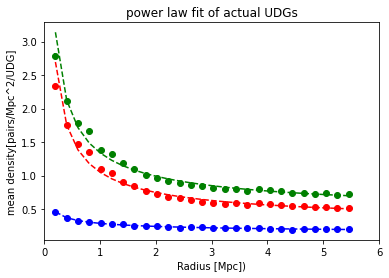

In [25]:
fig, ax = plt.subplots()
plt.title('power law fit of actual UDGs')
plt.xlabel('Radius [Mpc])')
plt.ylabel('mean density[pairs/Mpc^2/UDG]')
plt.xlim(0,6.)
#plt.ylim(0.5,4.)
#plt.ylim(0.2,1.6)

arr1 = plt.errorbar(x_prime, y_prime_lin_val, yerr=y_prime_lin_err, label='all UDGs', color='g',fmt='o')
popt_power_all, pcov_power_all = scipy.optimize.curve_fit(power_all, x_prime, y_prime_lin_val, sigma=y_prime_lin_err, p0=[1,-1.0,0.5], bounds=[(-np.inf,-np.inf,0), (np.inf,np.inf,np.inf)])

plt.plot(x_prime, power_all(x_prime, *popt_power_all), color='g',linestyle='dashed')
print('all UDGs constants: ', popt_power_all)
print("a =", popt_power_all[0], "+/-", pcov_power_all[0,0]**0.5, "\nk =", popt_power_all[1], "+/-", pcov_power_all[1,1]**0.5, "\nb =", popt_power_all[2], "+/-", pcov_power_all[2,2]**0.5)

arr2 = plt.errorbar(x_prime, y_r_lin_val, yerr=y_r_lin_err, label='red', color='r',fmt='o')
popt_power_red, pcov_power_red = scipy.optimize.curve_fit(power_all, x_prime, y_r_lin_val, sigma=y_r_lin_err, p0=[1,-1.0,0.5], bounds=[(-np.inf,-np.inf,0), (np.inf,np.inf,np.inf)],maxfev=1000000)

plt.plot(x_prime, power_red(x_prime, *popt_power_red), color='r',linestyle='dashed')
print('red UDGs constants: ', popt_power_red)
print("a =", popt_power_red[0], "+/-", pcov_power_red[0,0]**0.5, "\nk =", popt_power_red[1], "+/-", pcov_power_red[1,1]**0.5, "\nb =", popt_power_red[2], "+/-", pcov_power_red[2,2]**0.5)

arr3 = plt.errorbar(x_prime, y_b_lin_val, yerr=y_b_lin_err, label='blue', color='b',fmt='o')
popt_power_blue, pcov_power_blue = scipy.optimize.curve_fit(power_all, x_prime, y_b_lin_val, sigma=y_b_lin_err, p0=[1,-1.0,0.5], bounds=[(0.0,-np.inf,0), (1.,np.inf,np.inf)], maxfev=1000000)
#popt_power_blue, pcov_power_blue = scipy.optimize.curve_fit(power_all, x_prime, y_b_lin_val, sigma=y_b_lin_err, p0=[1,-1.0,0.5], bounds=[(-np.inf,-np.inf,0), (np.inf,np.inf,np.inf)], maxfev=1000000)
plt.plot(x_prime, power_blue(x_prime, *popt_power_blue), color='b',linestyle='dashed')
print('blue UDGs constants: ', popt_power_blue)
print("a =", popt_power_blue[0], "+/-", pcov_power_blue[0,0]**0.5, "\nk =", popt_power_blue[1], "+/-", pcov_power_blue[1,1]**0.5, "\nb =", popt_power_blue[2], "+/-", pcov_power_blue[2,2]**0.5)
print(x_prime)
plt.show()
ax.legend()

In [26]:
z = (0.02001385 + 0.013342564)/2 # avg redshift
deg = np.sqrt(15000)*u.deg
Area_survey = (deg/u.deg/206265*3600*cosmo.angular_diameter_distance(z)/u.Mpc)**2 # deg^2 to Mpc^2
normal_length = Area_survey * popt_power_all[2]

In [27]:
# Defines power law function for fitting
def power_no_back(x, a, k):
    return 2*np.pi*a*(x**k)*x 

# Defines function for fitting for background
def background(x, b):
    return 2*np.pi*b*x

r_out = 0.2  # units Mpc

N1_all = scipy.integrate.quad(power_no_back,min_sep,r_out,args=(popt_power_all[0], popt_power_all[1])) #integrate from o to 0.2 Mpc
N2_all = scipy.integrate.quad(background,min_sep,r_out,args=(popt_power_all[2]))
print(N1_all)
print("N1 =", N1_all[0], ", N2 =", N2_all[0],  ", N1/N2 =", N1_all[0]/N2_all[0])
print(N1_all[0]*len_udg/((Area_survey) * .18))

N1_red = scipy.integrate.quad(power_no_back,min_sep,r_out,args=(popt_power_red[0], popt_power_red[1]))
N2_red = scipy.integrate.quad(background,min_sep,r_out,args=(popt_power_red[2]))
print("N1 =", N1_red[0],", N2 =", N2_red[0], ", N1/N2 =", N1_red[0]/N2_red[0])
print(N1_red[0]*len_udg/((Area_survey) * .18))

N1_blue = scipy.integrate.quad(power_no_back,min_sep,r_out,args=(popt_power_blue[0], popt_power_blue[1]))
N2_blue = scipy.integrate.quad(background,min_sep,r_out,args=(popt_power_blue[2]))
print("N1 =", N1_blue[0], ", N2 =", N2_blue[0], ", N1/N2 =", N1_blue[0]/N2_blue[0])
print(N1_blue[0]*len_udg/((Area_survey) * .18))


(0.31323826085186024, 3.4776432939127604e-15)
N1 = 0.31323826085186024 , N2 = 0.03691639878757604 , N1/N2 = 8.485070893677701
0.4043897626101588
N1 = 0.2802898544427617 , N2 = 0.025218493432891915 , N1/N2 = 11.114456745349663
0.3618534574668363
N1 = 0.03743889946975927 , N2 = 0.009974412574037722 , N1/N2 = 3.7534941723995385
0.048333519755179806


In [28]:
a = uncertainties.ufloat(popt_power_all[0], pcov_power_all[0,0]**0.5)
k = uncertainties.ufloat(popt_power_all[1],  pcov_power_all[1,1]**0.5)
b = uncertainties.ufloat(popt_power_all[2],  pcov_power_all[2,2]**0.5)

all UDGs constants:  [ 0.94891562 -0.66296586  0.39169516]
a = 0.9489156163031328 +/- 0.06509440054387236 
k = -0.6629658645301296 +/- 0.05581142436460724 
b = 0.39169515654629183 +/- 0.05419609805804206
red UDGs constants:  [ 0.87518084 -0.61313867  0.18548799]
a = 0.8751808404792619 +/- 0.07506789499949025 
k = -0.6131386680240162 +/- 0.05513410588696966 
b = 0.18548798511568226 +/- 0.0617140450222693
blue UDGs constants:  [ 0.18148597 -0.41534348  0.1058318 ]
a = 0.18148596549187604 +/- 0.025181984194095695 
k = -0.41534347639474156 +/- 0.07233410577012875 
b = 0.10583180437307056 +/- 0.024193427868406964


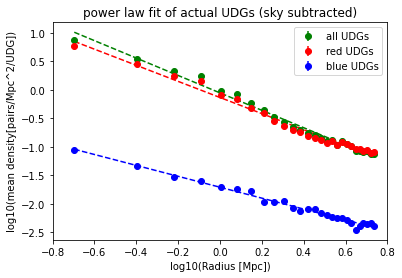

In [29]:
fig, ax = plt.subplots()
plt.title('power law fit of actual UDGs (sky subtracted)')
plt.xlabel('log10(Radius [Mpc])')
plt.ylabel('log10(mean density[pairs/Mpc^2/UDG])')

plt.xlim(-0.8,0.8)
#plt.ylim(-1.3, 1.4)
#plt.ylim(-2.2,0.5)

xp_log = np.log10(x_prime)

p0 = [1,-1,0.5]
popt_power_all, pcov_power_all = scipy.optimize.curve_fit(power_all, x_prime, y_prime_lin_val, sigma=y_prime_lin_err, p0=p0, bounds=[(-np.inf,-np.inf,0), (np.inf,np.inf,np.inf)])
plt.errorbar(xp_log,np.log(y_prime_lin_val-popt_power_all[2]), yerr=y_prime_lin_err, label='all UDGs', color='g',fmt='o')
plt.plot(xp_log, np.log(power_all(x_prime, *popt_power_all)-popt_power_all[2]), color='g',linestyle='dashed')
print('all UDGs constants: ', popt_power_all)
print("a =", popt_power_all[0], "+/-", pcov_power_all[0,0]**0.5, "\nk =", popt_power_all[1], "+/-", pcov_power_all[1,1]**0.5, "\nb =", popt_power_all[2], "+/-", pcov_power_all[2,2]**0.5)

popt_power_red, pcov_power_red = scipy.optimize.curve_fit(power_red, x_prime, y_r_lin_val, sigma=y_r_lin_val ,p0=p0,bounds=[(-np.inf,-np.inf,0), (np.inf,np.inf,np.inf)])
plt.errorbar(xp_log, np.log(y_r_lin_val-popt_power_red[2]), yerr=y_r_lin_err,label='red UDGs', color='r', fmt='o')
plt.plot(xp_log, np.log(power_red(x_prime, *popt_power_red)-popt_power_red[2]), color='r',linestyle='dashed')
print('red UDGs constants: ', popt_power_red)
print("a =", popt_power_red[0], "+/-", pcov_power_red[0,0]**0.5, "\nk =", popt_power_red[1], "+/-", pcov_power_red[1,1]**0.5, "\nb =", popt_power_red[2], "+/-", pcov_power_red[2,2]**0.5)

popt_power_blue, pcov_power_blue = scipy.optimize.curve_fit(power_blue, x_prime, y_b_lin_val, sigma=y_b_lin_err, p0=p0, bounds=[(0,-np.inf,0), (1,np.inf,np.inf)])
plt.errorbar(xp_log, np.log(y_b_lin_val-popt_power_blue[2]), yerr=y_b_lin_err ,label='blue UDGs', color='b',fmt='o')
plt.plot(xp_log, np.log(power_blue(x_prime, *popt_power_blue)-popt_power_blue[2]), color='b',linestyle='dashed')
print('blue UDGs constants: ', popt_power_blue)
print("a =", popt_power_blue[0], "+/-", pcov_power_blue[0,0]**0.5, "\nk =", popt_power_blue[1], "+/-", pcov_power_blue[1,1]**0.5, "\nb =", popt_power_blue[2], "+/-", pcov_power_blue[2,2]**0.5)

ax.legend()
#fname = fname + '.pdf'
#plt.savefig(fname)
plt.show()



In [30]:
import random
mu_a_all, sigma_a_all = popt_power_all[0], pcov_power_all[0,0]**0.5
mu_k_all, sigma_k_all = popt_power_all[1], pcov_power_all[1,1]**0.5
mu_a_red, sigma_a_red = popt_power_red[0], pcov_power_red[0,0]**0.5
mu_k_red, sigma_k_red = popt_power_red[1], pcov_power_red[1,1]**0.5
mu_a_blue, sigma_a_blue = popt_power_blue[0], pcov_power_blue[0,0]**0.5
mu_k_blue, sigma_k_blue = popt_power_blue[1], pcov_power_blue[1,1]**0.5
s_a_all = np.random.normal(mu_a_all, sigma_a_all, 10000)
s_b_all = np.random.normal(mu_k_all, sigma_k_all, 10000)
s_a_red = np.random.normal(mu_a_red, sigma_a_red, 10000)
s_b_red = np.random.normal(mu_k_red, sigma_k_red, 10000)
s_a_blue = np.random.normal(mu_a_blue, sigma_a_blue, 10000)
s_b_blue = np.random.normal(mu_k_blue, sigma_k_blue, 10000)

In [ ]:
z = (0.02001385 + 0.013342564)/2 # avg redshift
deg = np.sqrt(15000)*u.deg
Area_survey = (deg/u.deg/206265*3600*cosmo.angular_diameter_distance(z)/u.Mpc)**2 # deg^2 to Mpc^2

In [37]:
integral_all = np.array([])
r_out = 0.2  # units Mpc
for i in range(0, len(s_a_all)):
    N1_all = scipy.integrate.quad(power_no_back,min_sep,r_out,args=(s_a_all[i], s_b_all[i]))
    N1_value = N1_all[0]*len_udg/((Area_survey) * .18)
    integral_all = np.append(integral_all, N1_value)    

In [38]:
integral_red = np.array([])
for i in range(0, len(s_a_all)):
    N1_r = scipy.integrate.quad(power_no_back,min_sep,r_out,args=(s_a_red[i], s_b_red[i]))
    N1_red = N1_r[0]*len_udg/((Area_survey) * .18)
    integral_red = np.append(integral_red, N1_red)
    #print(N1_red)

In [39]:
integral_blue = np.array([])
for i in range(0, len(s_a_all)):
    N1_b = scipy.integrate.quad(power_no_back,min_sep,r_out,args=(s_a_blue[i], s_b_blue[i]))
    N1_blue = N1_b[0]*len_udg/((Area_survey) * .18)
    integral_blue = np.append(integral_blue, N1_blue)
    #print(N1_blue)

(array([9.000e+00, 2.900e+01, 1.210e+02, 3.760e+02, 6.810e+02, 1.168e+03,
        1.495e+03, 1.600e+03, 1.448e+03, 1.213e+03, 8.290e+02, 5.010e+02,
        2.950e+02, 1.280e+02, 6.300e+01, 2.500e+01, 1.300e+01, 3.000e+00,
        2.000e+00, 1.000e+00]),
 array([0.24464521, 0.2653805 , 0.28611579, 0.30685108, 0.32758637,
        0.34832166, 0.36905695, 0.38979224, 0.41052753, 0.43126282,
        0.45199811, 0.4727334 , 0.49346869, 0.51420398, 0.53493927,
        0.55567456, 0.57640985, 0.59714514, 0.61788043, 0.63861572,
        0.65935101]),
 <BarContainer object of 20 artists>)

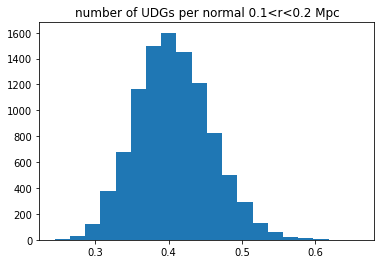

In [40]:
fig, ax = plt.subplots()
plt.title('number of UDGs per normal 0.1<r<0.2 Mpc')
plt.hist(integral_all.data, bins=20)

(array([1.700e+01, 4.000e+01, 1.370e+02, 4.010e+02, 7.160e+02, 1.100e+03,
        1.346e+03, 1.534e+03, 1.439e+03, 1.180e+03, 8.320e+02, 5.390e+02,
        3.620e+02, 1.870e+02, 1.000e+02, 3.900e+01, 1.400e+01, 9.000e+00,
        7.000e+00, 1.000e+00]),
 array([0.20275158, 0.22025431, 0.23775705, 0.25525979, 0.27276253,
        0.29026526, 0.307768  , 0.32527074, 0.34277347, 0.36027621,
        0.37777895, 0.39528169, 0.41278442, 0.43028716, 0.4477899 ,
        0.46529264, 0.48279537, 0.50029811, 0.51780085, 0.53530359,
        0.55280632]),
 <BarContainer object of 20 artists>)

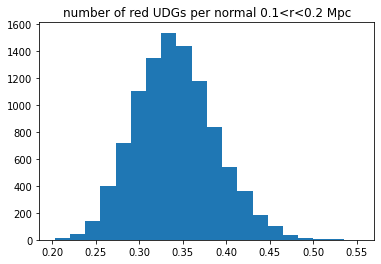

In [41]:
fig, ax = plt.subplots()
plt.title('number of red UDGs per normal 0.1<r<0.2 Mpc')
plt.hist(integral_red.data, bins=20)

(array([   8.,   32.,  148.,  425.,  820., 1250., 1581., 1587., 1399.,
        1054.,  724.,  434.,  281.,  132.,   65.,   36.,    8.,   12.,
           2.,    2.]),
 array([0.01986916, 0.02364265, 0.02741615, 0.03118964, 0.03496314,
        0.03873663, 0.04251013, 0.04628362, 0.05005712, 0.05383061,
        0.05760411, 0.06137761, 0.0651511 , 0.0689246 , 0.07269809,
        0.07647159, 0.08024508, 0.08401858, 0.08779207, 0.09156557,
        0.09533906]),
 <BarContainer object of 20 artists>)

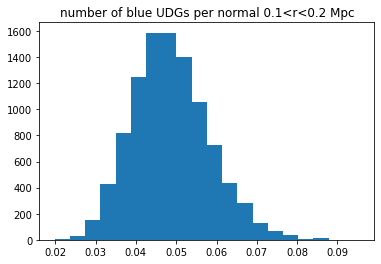

In [42]:
fig, ax = plt.subplots()
plt.title('number of blue UDGs per normal 0.1<r<0.2 Mpc')
plt.hist(integral_blue.data, bins=20)

NameError: name 'all_back' is not defined

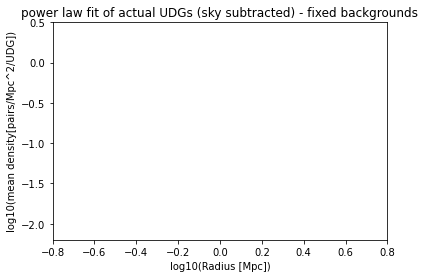

In [45]:
ig, ax = plt.subplots()
plt.title('power law fit of actual UDGs (sky subtracted) - fixed backgrounds')
plt.xlabel('log10(Radius [Mpc])')
plt.ylabel('log10(mean density[pairs/Mpc^2/UDG])')

plt.xlim(-0.8,0.8)
plt.ylim(-2.2,0.5)

newy = []
xp_log = np.log10(x_prime)

p0 = [1,-1]
popt_power_all, pcov_power_all = scipy.optimize.curve_fit(power_all_fixed, x_prime, y_prime_lin_val, sigma=y_prime_lin_err, p0=p0, bounds=[(-np.inf,-np.inf), (np.inf,np.inf)])
newy[:] = [i - all_back for i in y_prime_lin_val]
plt.errorbar(xp_log,np.log(newy), yerr=y_prime_lin_err, label='all UDGs', color='g',fmt='o')
plt.plot(xp_log, np.log(power_all_fixed(x_prime, *popt_power_all)-all_back), color='g',linestyle='dashed')
print('all UDGs constants: ', popt_power_all)
print("a =", popt_power_all[0], "+/-", pcov_power_all[0,0]**0.5, "\nk =", popt_power_all[1], "+/-", pcov_power_all[1,1]**0.5)
     
popt_power_red, pcov_power_red = scipy.optimize.curve_fit(power_red_fixed, x_prime, y_r_lin_val, sigma=y_r_lin_val ,p0=p0,bounds=[(-np.inf,-np.inf), (np.inf,np.inf)])
newy[:] = [i - red_back for i in y_r_lin_val]
plt.errorbar(xp_log, np.log(newy), yerr=y_r_lin_err,label='red UDGs', color='r', fmt='o')
plt.plot(xp_log, np.log(power_red_fixed(x_prime, *popt_power_red)-red_back), color='r',linestyle='dashed')
print('red UDGs constants: ', popt_power_red)
print("a =", popt_power_red[0], "+/-", pcov_power_red[0,0]**0.5, "\nk =", popt_power_red[1], "+/-", pcov_power_red[1,1]**0.5)

popt_power_blue, pcov_power_blue = scipy.optimize.curve_fit(power_blue_fixed, x_prime, y_b_lin_val, sigma=y_b_lin_err, p0=p0, bounds=[(-np.inf,-np.inf), (np.inf,np.inf)])
newy[:] = [i - blue_back for i in y_b_lin_val]
plt.errorbar(xp_log, np.log(newy), yerr=y_b_lin_err ,label='blue UDGs', color='b',fmt='o')
plt.plot(xp_log, np.log(power_blue_fixed(x_prime, *popt_power_blue)-blue_back), color='b',linestyle='dashed')
print('blue UDGs constants: ', popt_power_blue)
print("a =", popt_power_blue[0], "+/-", pcov_power_blue[0,0]**0.5, "\nk =", popt_power_blue[1], "+/-", pcov_power_blue[1,1]**0.5)

ax.legend()
#fname = fname + '.pdf'
#plt.savefig(fname)
plt.show()



In [44]:
# Defines power law function for fitting
def power_no_back(x, a, k):
    return 2*np.pi*a*(x**k)*x 

# Defines function for fitting for background
def background(x, b):
    return 2*np.pi*b*x

r_out = 0.2  # units Mpc

N1_all = scipy.integrate.quad(power_no_back,0,r_out,args=(popt_power_all[0], popt_power_all[1])) #integrate from o to 0.2 Mpc
N2_all = scipy.integrate.quad(background,0,r_out,args=(all_back))
print("N1 =", N1_all[0], ", N2 =", N2_all[0],  ", N1/N2 =", N1_all[0]/N2_all[0])
print(N1_all[0]/(N1_all[0]+N2_all[0]))

N1_red = scipy.integrate.quad(power_no_back,0,r_out,args=(popt_power_red[0], popt_power_red[1]))
N2_red = scipy.integrate.quad(background,0,r_out,args=(red_back))
print("N1 =", N1_red[0],", N2 =", N2_red[0], ", N1/N2 =", N1_red[0]/N2_red[0])
print(N1_red[0]/(N1_red[0]+N2_red[0]))

N1_blue = scipy.integrate.quad(power_no_back,0,r_out,args=(popt_power_blue[0], popt_power_blue[1]))
N2_blue = scipy.integrate.quad(background,0,r_out,args=(blue_back))
print("N1 =", N1_blue[0], ", N2 =", N2_blue[0], ", N1/N2 =", N1_blue[0]/N2_blue[0])
print(N1_blue[0]/(N1_blue[0]+N2_blue[0]))


NameError: name 'all_back' is not defined

In [16]:
(Area_survey) * .18

<Quantity 4110.00071157>

In [100]:
popt_power_all[0], popt_power_all[1]

(0.9772939388597933, -0.710547065153739)

In [101]:
pcov_power_all[0,0]**0.5, pcov_power_all[1,1]**0.5

(0.06314102766793396, 0.05472804102883179)

In [ ]:
0.9772939388597933 +/- 0.06314102766793396 
k = -0.710547065153739 +/- 0.05472804102883179


In [107]:
import random
mu_a_all, sigma_a_all = popt_power_all[0], pcov_power_all[0,0]**0.5
mu_k_all, sigma_k_all = popt_power_all[1], pcov_power_all[1,1]**0.5
s_a_all = np.random.normal(mu_a_all, sigma_a_all, 1000)
s_b_all = np.random.normal(mu_k_all, sigma_k_all, 1000)

In [ ]:
0.976895765516375 +/- 0.06304122141993207 
k = -0.7113421012145348 +/- 0.05473437335649142 